In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission_df = pd.read_csv('sample_submission.csv')

In [3]:
sample_submission_df.head()

,PassengerId,Transported
0,0013_01,0
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0


In [4]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


C:\Users\sthom\AppData\Local\Temp\ipykernel_18464\663931128.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr())


<AxesSubplot:>

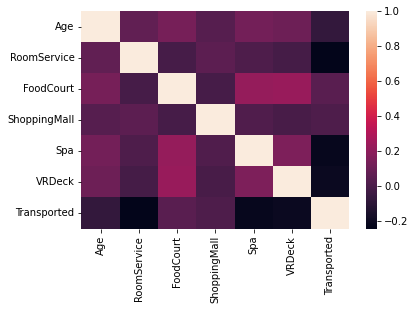

In [5]:
sns.heatmap(train_df.corr())

In [6]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
train_df.replace(False, int(0), inplace=True)

In [8]:
train_df.replace(True, int(1), inplace=True)

In [9]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   float64
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   float64
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   int64  
dtypes: float64(8), int64(1), object(5)
memory usage: 950.9+ KB


In [11]:
train_df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [12]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [13]:
train_df.fillna(int(train_df['VRDeck'].mean()), inplace=True)

In [14]:
train_df.fillna(int(train_df['Spa'].mean()), inplace=True)

In [15]:
train_df.fillna(int(train_df['ShoppingMall'].mean()), inplace=True)

In [16]:
train_df.fillna(int(train_df['FoodCourt'].mean()), inplace=True)

In [17]:
train_df.fillna(int(train_df['RoomService'].mean()), inplace=True)

In [18]:
train_df.fillna(int(train_df['VIP'].mean()), inplace=True)

In [19]:
train_df.fillna(int(train_df['Age'].mean()), inplace=True)

In [20]:
train_df.fillna(int(train_df['CryoSleep'].mean()), inplace=True)

In [21]:
train_df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', 304], dtype=object)

In [22]:
train_df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [23]:
train_df.drop(['Name'], axis=1, inplace=True)

In [24]:
train_df.drop(['Cabin'], axis=1, inplace=True)

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   float64
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   float64
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 815.1+ KB


In [26]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1


In [27]:
train_df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', 304], dtype=object)

In [28]:
train_df.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', 304], dtype=object)

In [29]:
train_df = pd.get_dummies(train_df, columns = ['HomePlanet', 'Destination'], drop_first=True)

In [30]:
train_df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1
1,0002_01,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,0,0,1
2,0003_01,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,0,0,1
3,0003_02,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,0,0,1
4,0004_01,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,0,0,1


In [31]:
train_df = train_df.rename(columns = {'HomePlanet_Earth': 'HP_Earth', 'HomePlanet_Europa': 'HP_Europa', 'HomePlanet_Mars': 'HP_Mars', 'Destination_55 Cancri e': 'Dest_Cancrie', 'Destination_PSO J318.5-22': 'Dest_PSOJ318.5-22', 'Destination_TRAPPIST-1e': 'Dest_TRAPPIST-1e'})


In [32]:
train_df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HP_Earth,HP_Europa,HP_Mars,Dest_Cancrie,Dest_PSOJ318.5-22,Dest_TRAPPIST-1e
0,0001_01,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1
1,0002_01,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,0,0,1
2,0003_01,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,0,0,1
3,0003_02,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,0,0,1
4,0004_01,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,0,0,1


C:\Users\sthom\AppData\Local\Temp\ipykernel_18464\663931128.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr())


<AxesSubplot:>

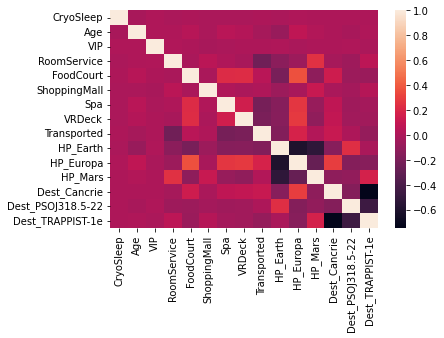

In [33]:
sns.heatmap(train_df.corr())

In [34]:
import matplotlib.pyplot as plt

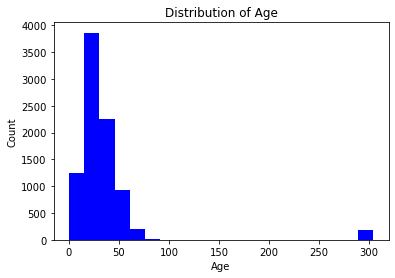

In [35]:
plt.hist(train_df['Age'], bins=20, facecolor='b')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

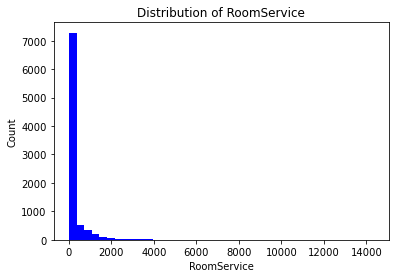

In [36]:
plt.hist(train_df['RoomService'], bins=40, facecolor='b')
plt.xlabel('RoomService')
plt.ylabel('Count')
plt.title('Distribution of RoomService')
plt.show()

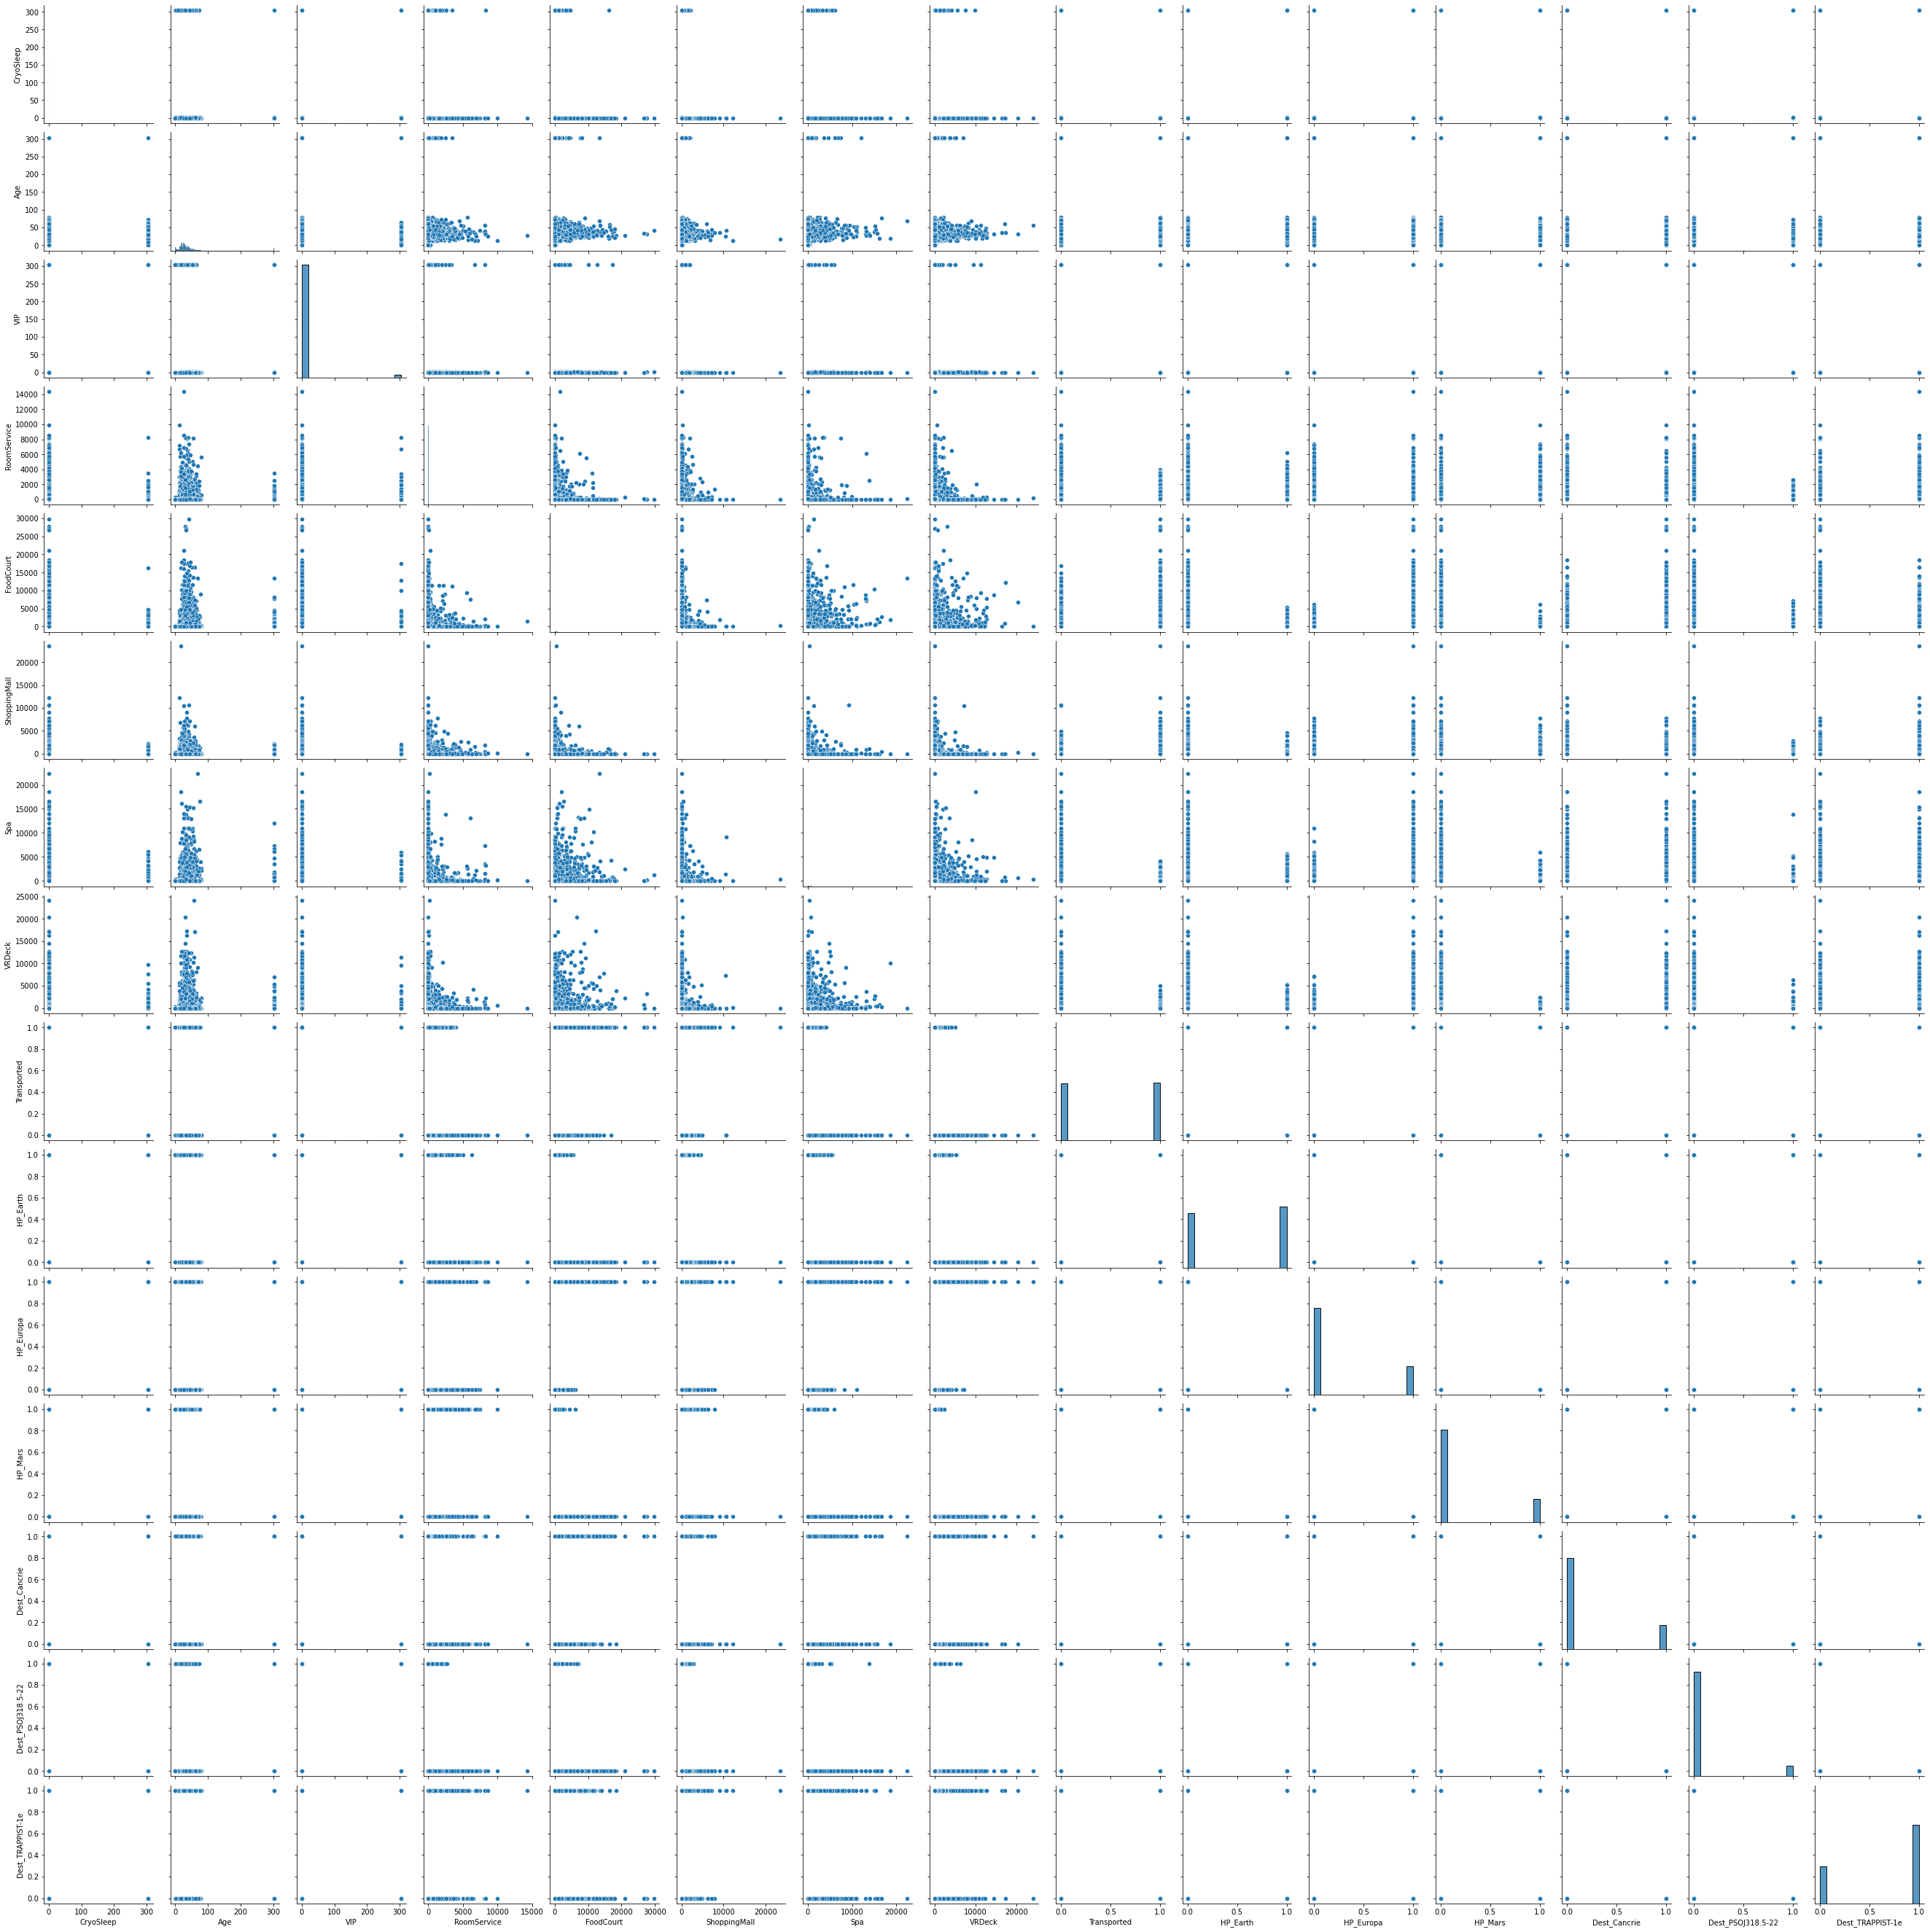

In [37]:
sns.pairplot(train_df)

In [38]:
def clean(df):
    df.replace(False, int(0), inplace=True)
    df.replace(True, int(1), inplace=True)
    df.fillna(int(df['VRDeck'].mean()), inplace=True)
    df.fillna(int(df['Spa'].mean()), inplace=True)
    df.fillna(int(df['ShoppingMall'].mean()), inplace=True)
    df.fillna(int(df['FoodCourt'].mean()), inplace=True)
    df.fillna(int(df['RoomService'].mean()), inplace=True)
    df.fillna(int(df['VIP'].mean()), inplace=True)
    df.fillna(int(df['Age'].mean()), inplace=True)
    df.fillna(int(df['CryoSleep'].mean()), inplace=True)
    df.drop(['Cabin'], axis=1, inplace=True)
    df.drop(['Name'], axis=1, inplace=True)
    df = pd.get_dummies(df, columns = ['HomePlanet', 'Destination'], drop_first=True)
    df = df.rename(columns = {'HomePlanet_Earth': 'HP_Earth', 'HomePlanet_Europa': 'HP_Europa', 'HomePlanet_Mars': 'HP_Mars', 'Destination_55 Cancri e': 'Dest_Cancrie', 'Destination_PSO J318.5-22': 'Dest_PSOJ318.5-22', 'Destination_TRAPPIST-1e': 'Dest_TRAPPIST-1e'})
    return(df)

In [39]:
test_X = clean(test_df)

In [40]:
test_X.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HP_Earth,HP_Europa,HP_Mars,Dest_Cancrie,Dest_PSOJ318.5-22,Dest_TRAPPIST-1e
0,0013_01,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1
1,0018_01,0.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,0,1
2,0019_01,1.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0
3,0021_01,0.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,0,1,0,0,0,1
4,0023_01,0.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,1,0,0,0,0,1


In [41]:
test_X.shape

(4277, 15)

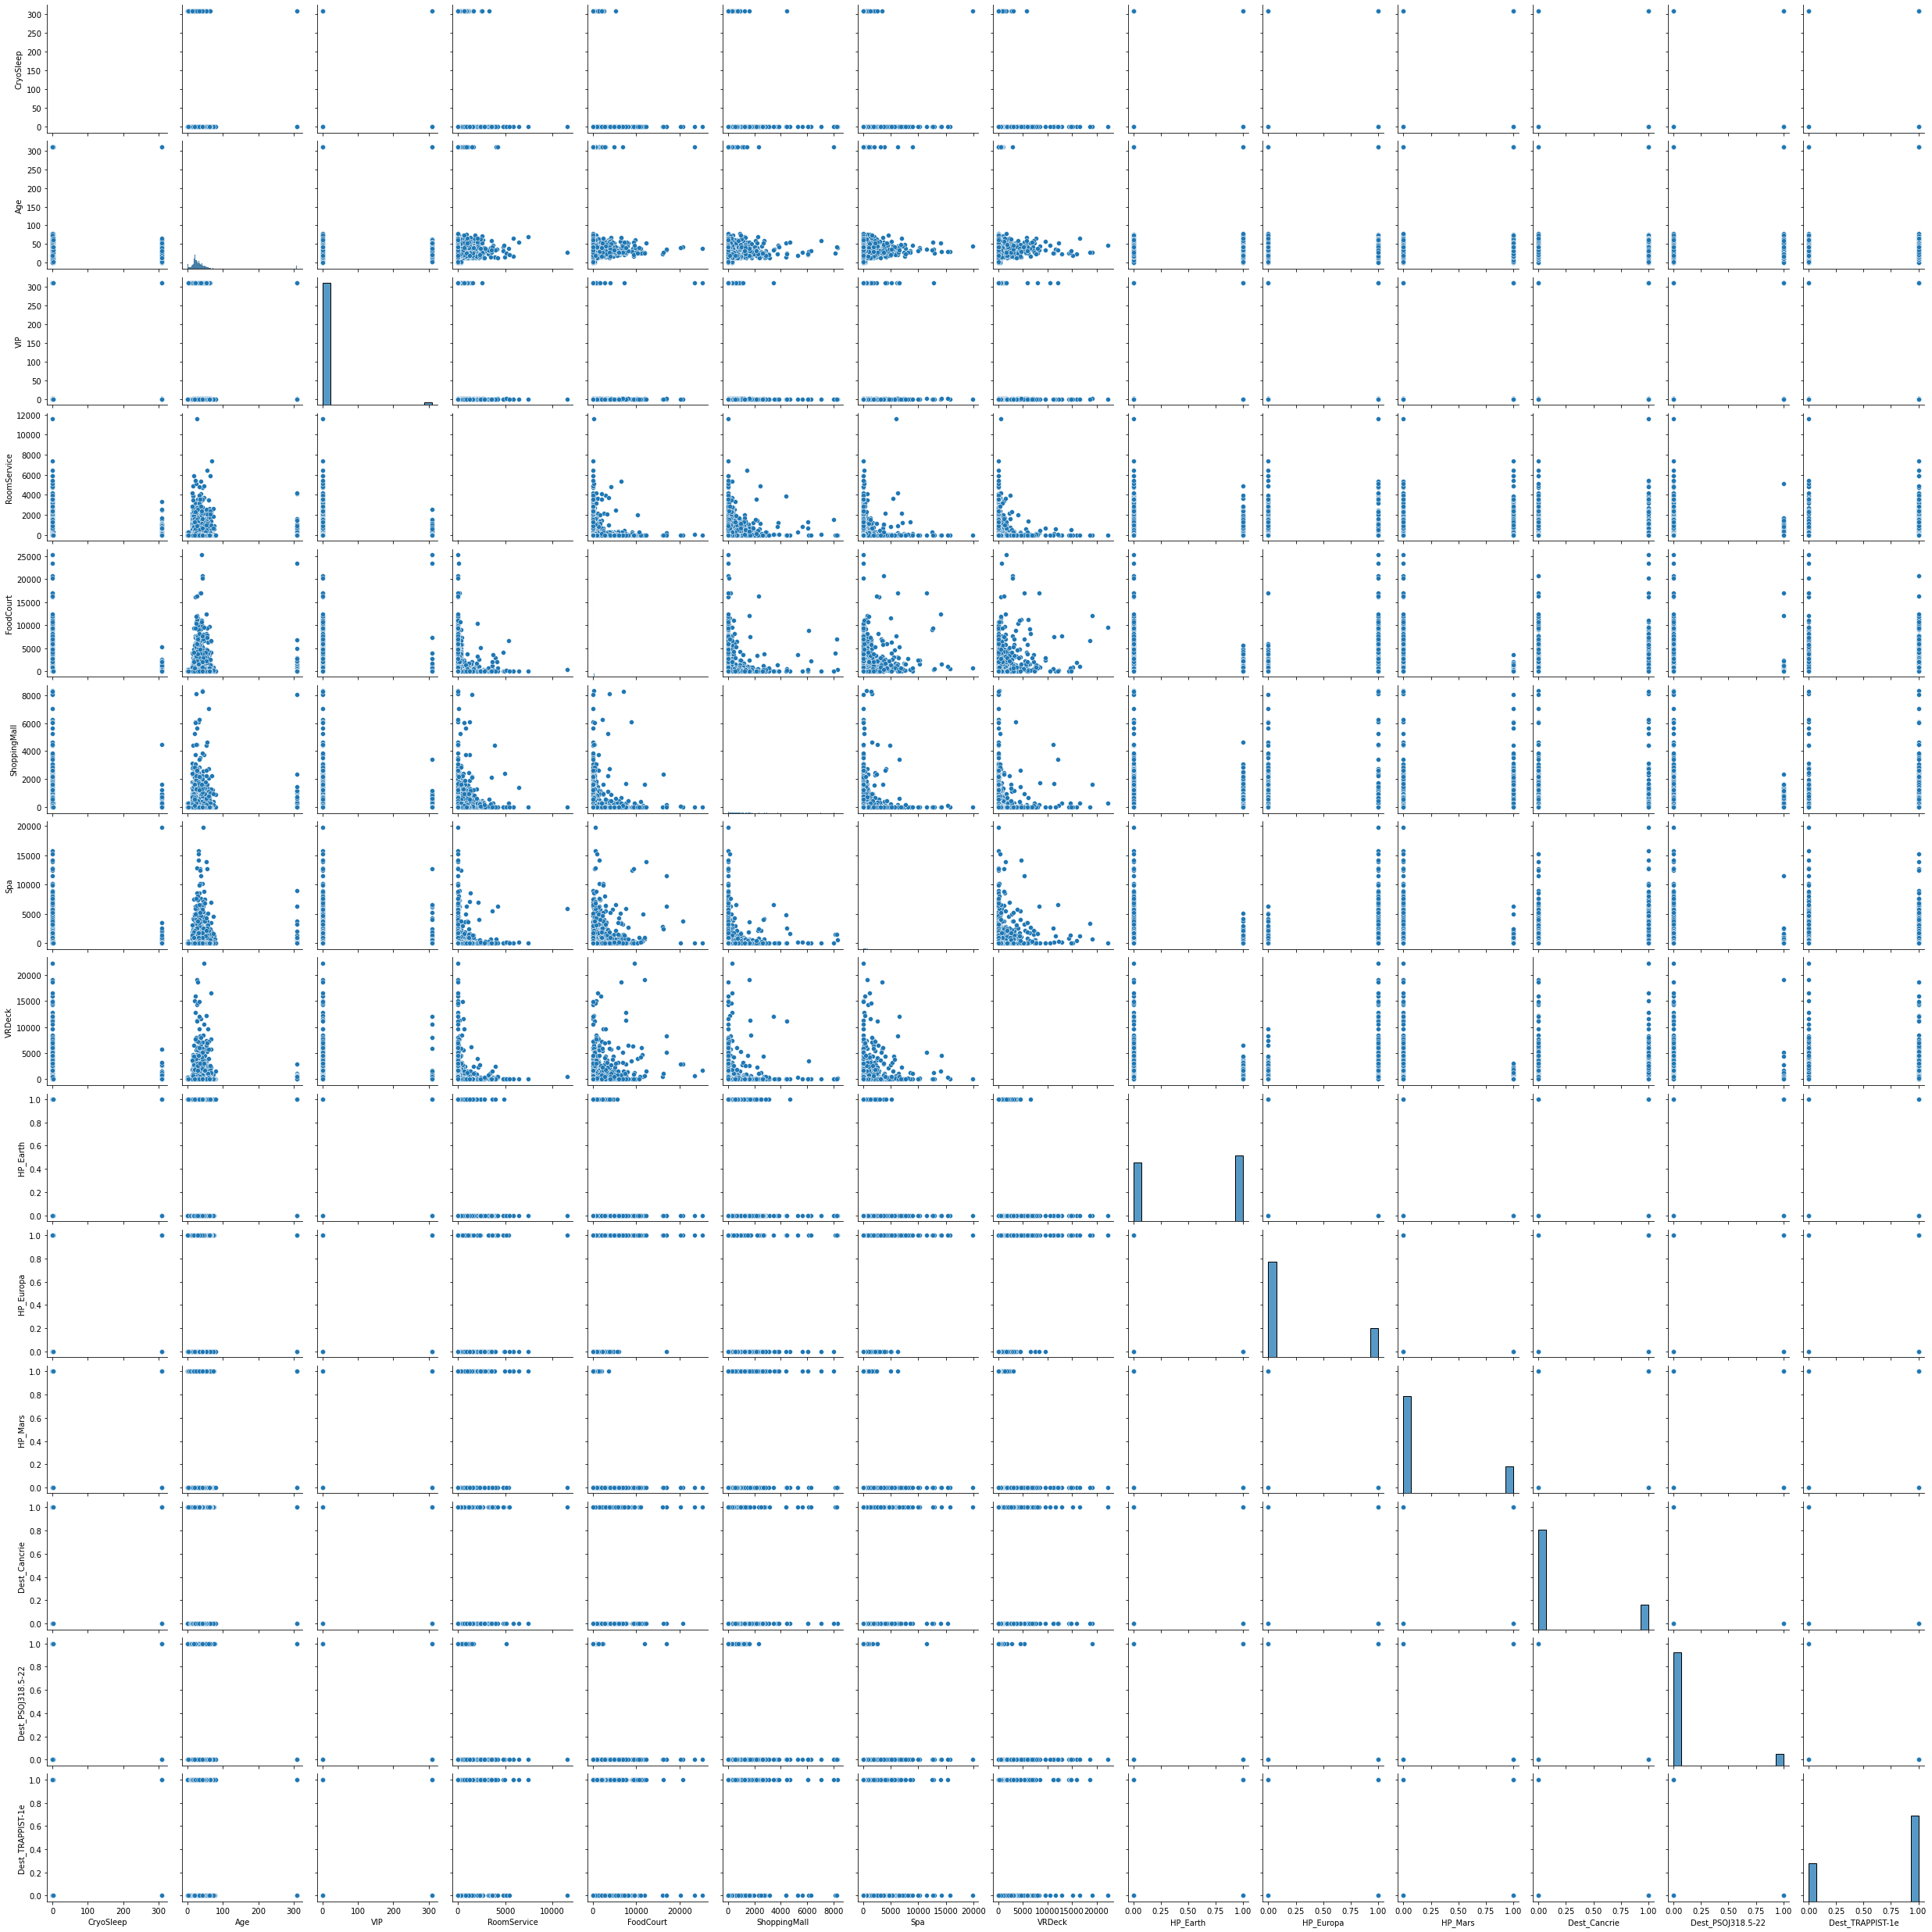

In [42]:
sns.pairplot(test_X)

C:\Users\sthom\AppData\Local\Temp\ipykernel_18464\1572343573.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.pairplot(test_X.corr())


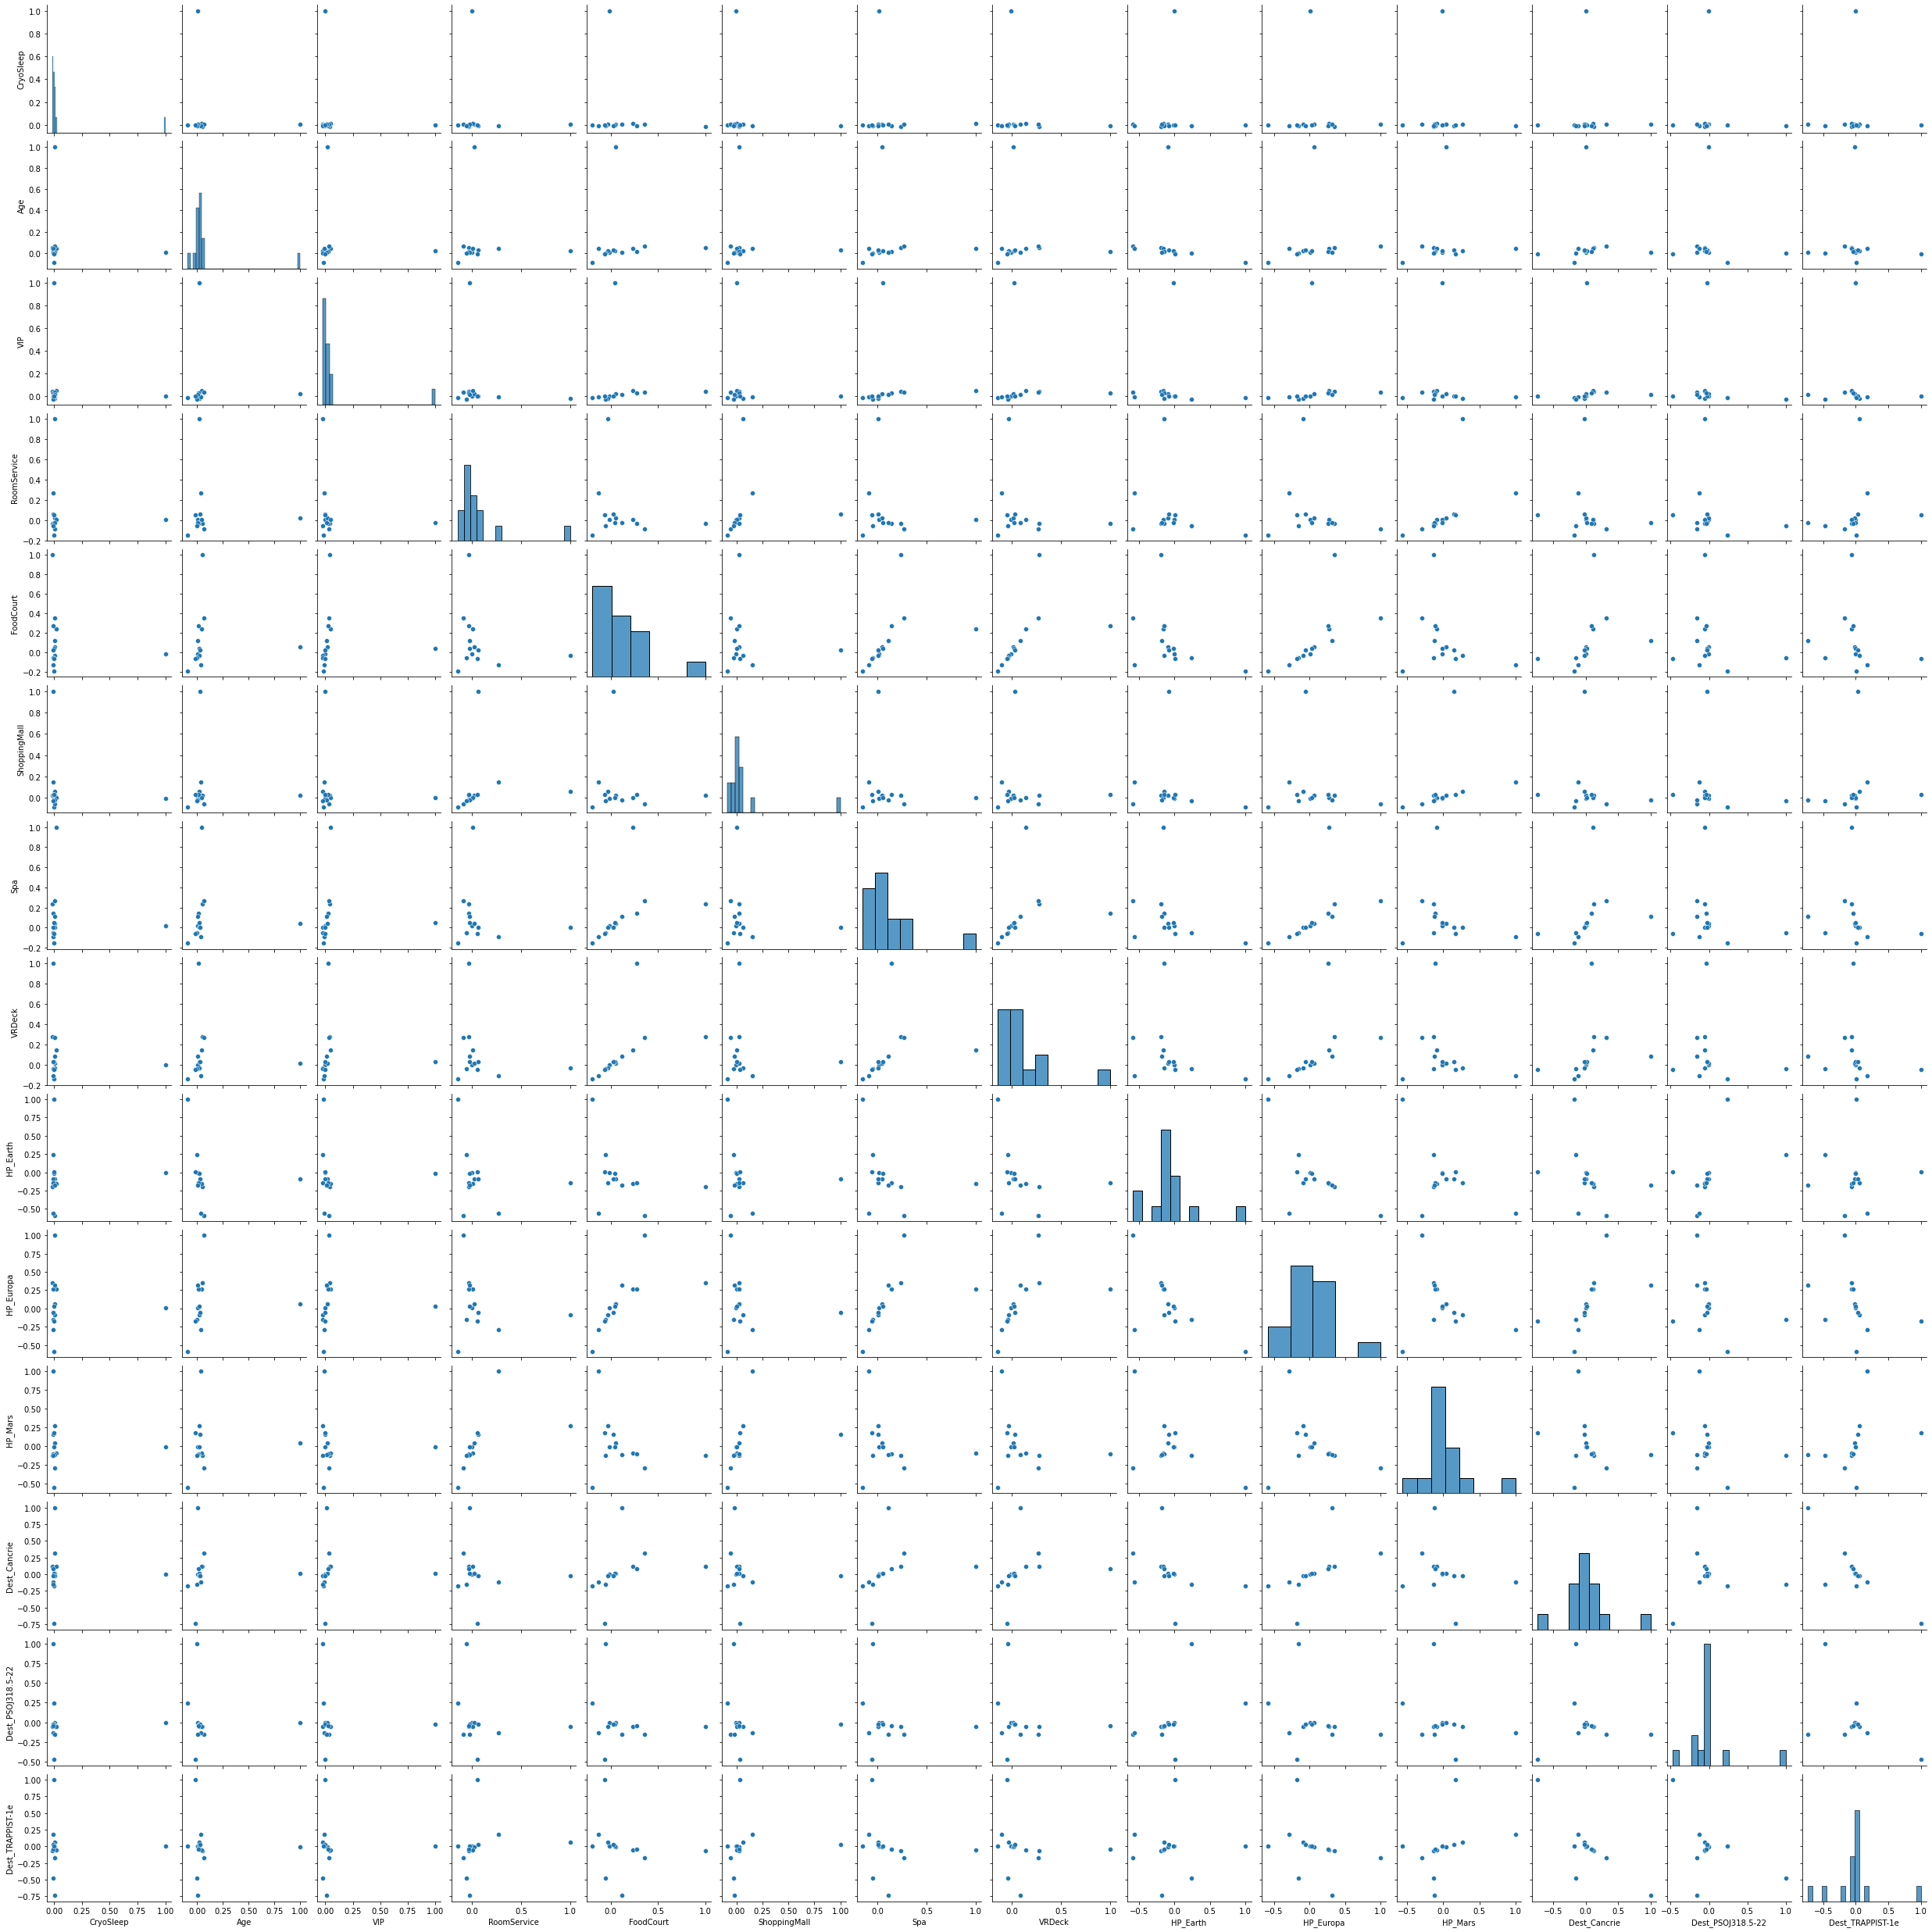

In [43]:
sns.pairplot(test_X.corr())

C:\Users\sthom\AppData\Local\Temp\ipykernel_18464\2683500716.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test_X.corr())


<AxesSubplot:>

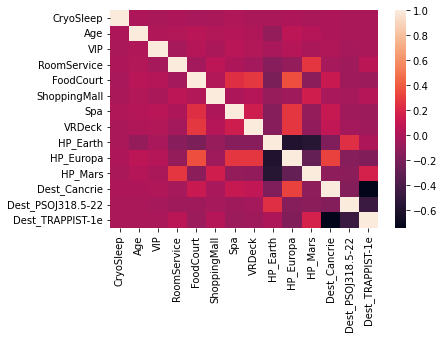

In [44]:
sns.heatmap(test_X.corr())

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
columns = ['PassengerId', 'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'HP_Earth', 'HP_Europa', 'HP_Mars', 'Dest_Cancrie', 'Dest_PSOJ318.5-22', 'Dest_TRAPPIST-1e']

In [47]:
X = train_df[columns]
y = train_df['Transported']

In [48]:
X.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HP_Earth,HP_Europa,HP_Mars,Dest_Cancrie,Dest_PSOJ318.5-22,Dest_TRAPPIST-1e
0,0001_01,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1
1,0002_01,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,1
2,0003_01,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1
3,0003_02,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1
4,0004_01,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,1


In [49]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [50]:
X_test.shape, y_test.shape

((2869, 15), (2869,))

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [53]:
y_pred.shape

(2869,)

In [54]:
test_X.PassengerId.shape

(4277,)

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_rf = accuracy_score(y_test, y_pred)
print(accuracy_rf)

0.7818055071453468


In [57]:
test_df.shape

(4277, 11)

In [58]:
test_X = test_X.reindex(columns=X_train.columns, fill_value=0)

In [59]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        4277 non-null   object 
 1   CryoSleep          4277 non-null   float64
 2   Age                4277 non-null   float64
 3   VIP                4277 non-null   float64
 4   RoomService        4277 non-null   float64
 5   FoodCourt          4277 non-null   float64
 6   ShoppingMall       4277 non-null   float64
 7   Spa                4277 non-null   float64
 8   VRDeck             4277 non-null   float64
 9   HP_Earth           4277 non-null   uint8  
 10  HP_Europa          4277 non-null   uint8  
 11  HP_Mars            4277 non-null   uint8  
 12  Dest_Cancrie       4277 non-null   uint8  
 13  Dest_PSOJ318.5-22  4277 non-null   uint8  
 14  Dest_TRAPPIST-1e   4277 non-null   uint8  
dtypes: float64(8), object(1), uint8(6)
memory usage: 325.9+ KB


In [60]:
t_pred = rf.predict(test_X)
t_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [61]:
t_pred.shape

(4277,)

In [62]:
submission = pd.DataFrame({'PassengerId':test_X['PassengerId'],'Transported':t_pred})

In [68]:
submission['Transported'] = list(map(bool, submission['Transported']))

In [69]:
print(submission)

     PassengerId  Transported
0        0013_01        False
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01        False
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01         True
4276     9277_01        False

[4277 rows x 2 columns]


In [70]:
submission.to_csv('sample_submission.csv', index=False)